In [ ]:
Importing Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
Generating Dataset

In [36]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_users = 200  
num_questions = 18  

responses = np.random.randint(0, 4, size=(num_users, num_questions))

column_names = [f'Q{i+1}' for i in range(num_questions)]

df = pd.DataFrame(responses, columns=column_names)

df['Total_Sum'] = df.sum(axis=1)

df['User'] = [f'User{i+1}' for i in range(num_users)]

df = df[['User'] + column_names + ['Total_Sum']]

print("Dataset:")
print(df.head(5))


Dataset:
    User  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  Q15  \
0  User1   2   3   0   2   2   3   0   0   2    1    2    2    2    2    3   
1  User2   3   2   1   0   1   3   3   1   1    1    3    3    0    0    3   
2  User3   3   0   0   2   2   2   1   3   3    3    3    2    1    1    2   
3  User4   2   3   3   0   2   0   2   2   0    0    2    1    3    0    3   
4  User5   0   1   0   1   3   3   2   3   2    3    0    3    2    2    1   

   Q16  Q17  Q18  Total_Sum  
0    0    3    3         32  
1    1    1    0         27  
2    1    2    3         34  
3    1    1    1         26  
4    0    3    1         30  


In [ ]:
Cluster Model

In [45]:
k = 3  

X = df[['Total_Sum']].values

# Initialize KMeans and fit the data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit_predict(X)


array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0,
       2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2,
       0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2,
       1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1,
       0, 1])

In [46]:
clusters = kmeans.labels_

df['Cluster'] = clusters

print("Users with Cluster Assignments:")
print(df)

Users with Cluster Assignments:
        User  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  ...  Q11  Q12  Q13  Q14  \
0      User1   2   3   0   2   2   3   0   0   2  ...    2    2    2    2   
1      User2   3   2   1   0   1   3   3   1   1  ...    3    3    0    0   
2      User3   3   0   0   2   2   2   1   3   3  ...    3    2    1    1   
3      User4   2   3   3   0   2   0   2   2   0  ...    2    1    3    0   
4      User5   0   1   0   1   3   3   2   3   2  ...    0    3    2    2   
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
195  User196   1   0   0   3   3   0   2   0   3  ...    2    0    3    3   
196  User197   3   1   3   3   3   1   3   2   0  ...    3    0    1    1   
197  User198   0   3   0   3   0   0   0   1   3  ...    0    0    1    1   
198  User199   0   3   2   2   1   3   2   1   3  ...    2    0    3    2   
199  User200   3   3   0   2   0   3   0   3   0  ...    2    0    0    2   

     Q15  Q16  Q17  Q18  Total_Sum  Cluster

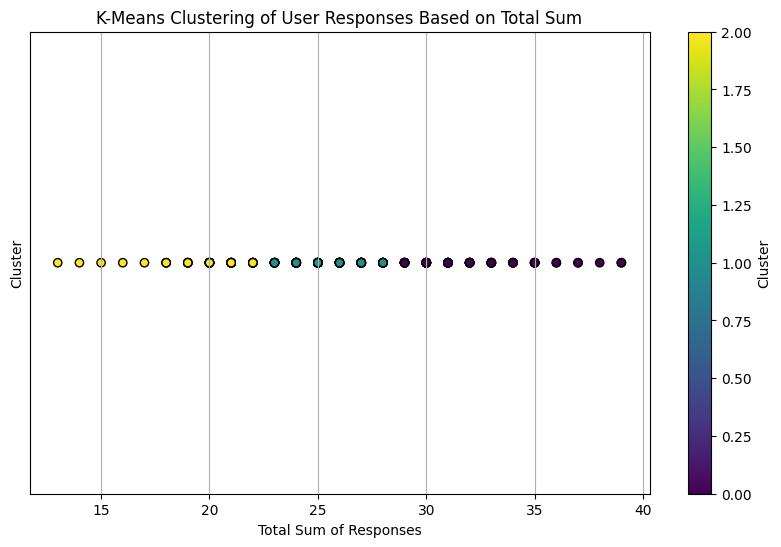

In [47]:
plt.figure(figsize=(10, 6)) 
plt.scatter(X[:, 0], np.zeros_like(X[:, 0]), c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering of User Responses Based on Total Sum')
plt.xlabel('Total Sum of Responses')
plt.ylabel('Cluster')
plt.yticks([])  
plt.colorbar(label='Cluster')  
plt.grid(True)  
plt.show()

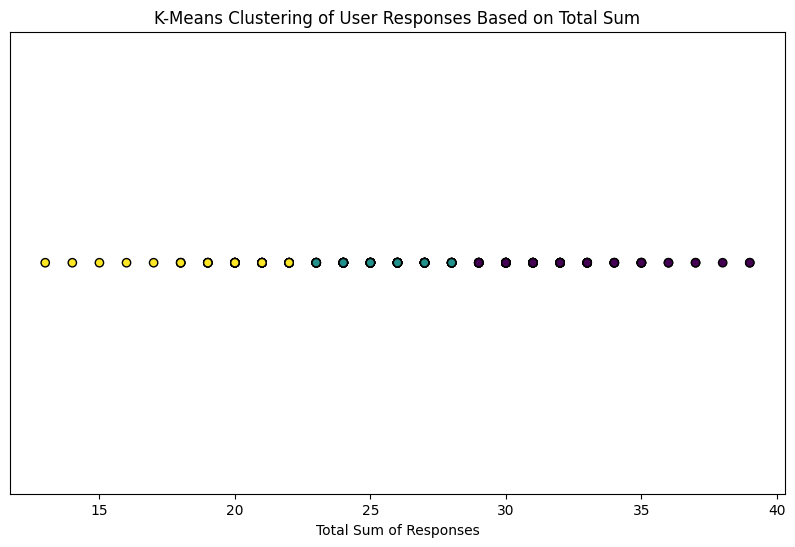

In [48]:
plt.figure(figsize=(10, 6))  
plt.scatter(df['Total_Sum'], np.zeros_like(df['Total_Sum']), c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering of User Responses Based on Total Sum')
plt.xlabel('Total Sum of Responses')
plt.yticks([])  
plt.show()

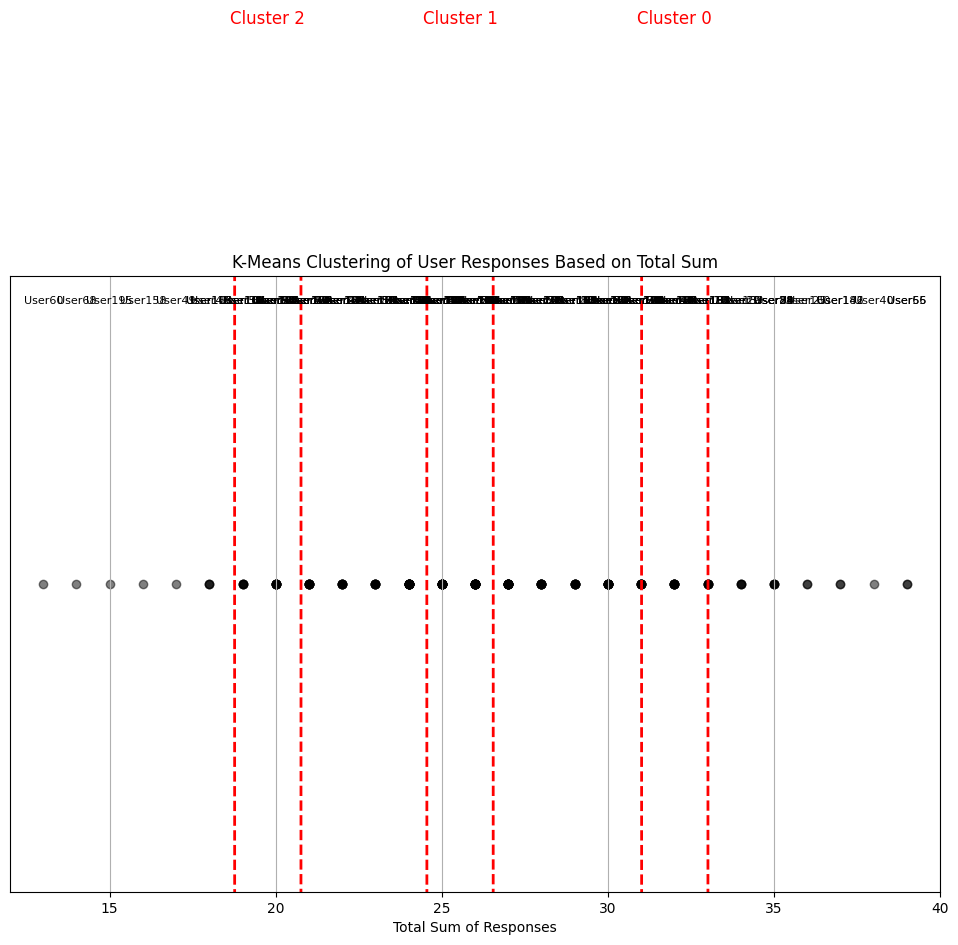

In [50]:
plt.figure(figsize=(12, 8)) 

for i in range(num_users):
    plt.scatter(df['Total_Sum'].iloc[i], 0, c='black', alpha=0.5, edgecolor='k')
    plt.text(df['Total_Sum'].iloc[i], 0.05, df['User'].iloc[i], fontsize=8, ha='center')

centroids = kmeans.cluster_centers_

for idx, centroid in enumerate(centroids):
    circle = plt.Circle((centroid[0], 0), 1, color='r', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_artist(circle)
    plt.text(centroid[0], 0.1, f'Cluster {idx}', fontsize=12, ha='center', color='red')

plt.title('K-Means Clustering of User Responses Based on Total Sum')
plt.xlabel('Total Sum of Responses')
plt.yticks([])  
plt.xlim(left=df['Total_Sum'].min() - 1, right=df['Total_Sum'].max() + 1) 
plt.grid(True)
plt.show()
